In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml

# Load config.yaml
CONFIG_PATH = Path("../../config.yaml").resolve()

try:
    with CONFIG_PATH.open("r", encoding="utf-8") as f:
        config = yaml.safe_load(f)
    print(f"Config loaded successfully from: {CONFIG_PATH}")
except Exception as e:
    raise FileNotFoundError(f"config.yaml not found at {CONFIG_PATH}") from e

print("Top-level keys:", list(config.keys()))

# === Load clean dataframe (df_full) ===
clean_cfg = config.get("data", {}).get("clean", {})
if "df_full" not in clean_cfg:
    raise KeyError("'df_full' is not defined in config['data']['clean']")

# --- Resolve path relative to config.yaml parent, stripping leading ../ ---
yaml_path = Path(clean_cfg["df_full"])
if yaml_path.is_absolute():
    path = yaml_path
else:
    parts = list(yaml_path.parts)
    while parts and parts[0] in ("..", "."):
        parts = parts[1:]
    rel = Path(*parts)  # e.g., "data/clean_data_txt/df_full.pkl"
    path = (CONFIG_PATH.parent / rel).resolve()

print("Resolved df_full path:", path)

if not path.exists():
    raise FileNotFoundError(f"File not found at: {path}")

df_full = pd.read_pickle(path)

Config loaded successfully from: /Users/Ricardo/Desktop/IRONHACK/Bootcamp/Week_5/Project/vanguard-ab-test/config.yaml
Top-level keys: ['data']
Resolved df_full path: /Users/Ricardo/Desktop/IRONHACK/Bootcamp/Week_5/Project/vanguard-ab-test/data/clean_data_txt/df_full.pkl


In [2]:
df_full.head()

,client_id,visitor_id,visit_id,process_step,date_time,variation,client_tenure_years,client_tenure_months,age,gender,number_of_accounts,balance,calls_6_months,logons_6_months
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79.0,U,2,189023.86,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79.0,U,2,189023.86,1,4
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79.0,U,2,189023.86,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79.0,U,2,189023.86,1,4
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79.0,U,2,189023.86,1,4


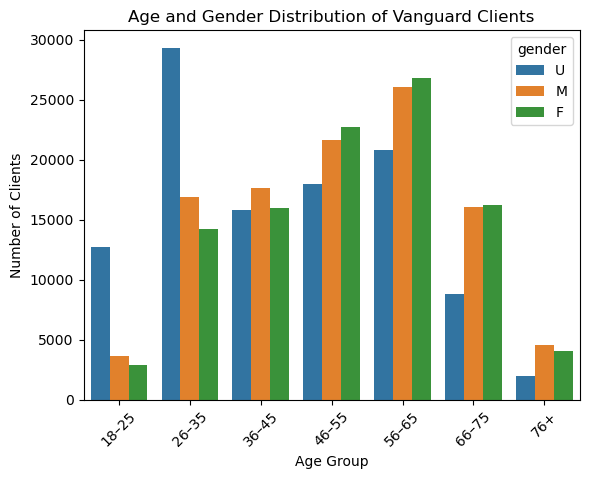

In [4]:
df_full['gender_clean'] = df_full['gender'].replace({'U': 'Unknown', 'X': 'Unknown'})

bins = [18, 25, 35, 45, 55, 65, 75, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '66–75', '76+']
df_full['age_group'] = pd.cut(df_full['age'], bins=bins, labels=labels, right=False)

sns.countplot(data=df_full, x='age_group', hue='gender')
plt.title("Age and Gender Distribution of Vanguard Clients")
plt.xlabel("Age Group")
plt.ylabel("Number of Clients")
plt.xticks(rotation=45)
plt.show()

In [5]:
df_full.to_csv('../../data/clean_data_txt/New_age_group_barchart.csv', index=False)